**<font size="6" color='darkgreen'>Kaggle Credit Card Fraud Dataset</font>**<br>
<br>
<font size=5>We use an open-source [dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud) from Kaggle.<font>

# Split Datasets

In [1]:
import pandas as pd 
import numpy as np

# import some models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from tensorflow import keras

# import evaluation metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

# plot some metrics
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt
%matplotlib inline

/Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework

In [2]:
df = pd.read_csv("creditcard.csv")

print("The number of example of this dataset is:", len(df.iloc[:,1]))
df.tail()

The number of example of this dataset is: 284807


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


**<font color='green' size=3>The column of *Time* and *amount* were applied no PCA, I would like to manually scaled them to make the data comparable and also make gradient descent faster in neural network later<font>**

In [3]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

# for new column of scaled_amount and scaled_time are inserted in the back
# let's move them in front for convenience processing 
cols = df.columns.tolist()
cols = cols[-2:] + cols[:-2]

df = df[cols]
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [4]:
# create training and test sets
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [5]:
# ratio of posiive examples
sum(y)/len(y)

0.001727485630620034

**<font color='green' size=3>Now we see that the dataset is extremely imbalanced with only 1~2 positive (fraud) examples in 1000.<br>
It means that accuracy is not a good metric to evaluate model performance, for a dummy classifier that always predict negative would have a accuracy of 99.8%<font>**
<br>

**<font size=3>split training and test set<font>**

In [5]:
X_train,X_test,y_train, y_test = train_test_split(X, y.values, test_size = 0.15)

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(242085, 30)
(242085,)
(42722, 30)


In [8]:
X_train.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
187617,-0.279746,0.504200,2.078095,0.217234,-1.753195,0.361775,0.616834,-0.677803,0.235888,-0.257255,...,0.036407,-0.092077,-0.357923,-0.869311,0.313859,0.346898,-0.217218,0.183637,-0.053215,-0.030492
46176,0.093202,-0.493697,1.288867,-0.447252,0.116773,-1.738420,-0.459379,-0.225626,-0.443980,0.022143,...,1.305058,0.061982,-0.075346,-0.176841,-0.136906,-0.782592,0.413850,-0.033430,0.014309,0.007822
107125,0.102424,-0.169151,-1.323087,0.441367,0.701632,1.874679,0.289870,1.323085,-0.239984,0.826184,...,0.079783,-0.410370,0.147845,0.733124,0.493522,-0.642139,-0.555427,-0.103686,-0.329055,0.170349
109838,-0.296793,-0.154266,-1.616099,2.163501,1.867250,2.934938,-0.683332,1.997586,-2.709080,-5.687147,...,0.817688,1.258458,-1.768385,0.672367,0.323328,-0.153967,-0.358128,0.188807,0.136089,0.211638
51048,7.533012,-0.469049,0.137776,-1.553011,-0.344942,1.510935,-0.748288,-0.185576,0.694350,-0.120838,...,-0.232972,0.952467,0.426695,-0.067818,-0.641153,0.021890,0.450504,-0.334317,-0.097529,0.103500


# Quick implementation with logisitc regression

In [8]:
# quickly implement a simple model to get intuition

for c in [0.001,0.01,0.1,1,10]:
    log_reg = LogisticRegression(C=c, solver='lbfgs',penalty="l2",max_iter=1500).fit(X_train,y_train)
    print("\nAUC score of regularization with L2 of C=" + str(c) +" is:", roc_auc_score(y_test,log_reg.predict(X_test)))
    print("F1 score of regularization with L2 of C=" + str(c) +" is:", f1_score(y_test,log_reg.predict(X_test)))


AUC score of regularization with L2 of C=0.001 is: 0.7104676936443721
F1 score of regularization with L2 of C=0.001 is: 0.5663716814159292

AUC score of regularization with L2 of C=0.01 is: 0.7433741549154977
F1 score of regularization with L2 of C=0.01 is: 0.6324786324786326

AUC score of regularization with L2 of C=0.1 is: 0.7565203252233195
F1 score of regularization with L2 of C=0.1 is: 0.65

AUC score of regularization with L2 of C=1 is: 0.7565203252233195
F1 score of regularization with L2 of C=1 is: 0.65

AUC score of regularization with L2 of C=10 is: 0.7565203252233195
F1 score of regularization with L2 of C=10 is: 0.65


In [18]:
precision, recall, thresholds = precision_recall_curve(y_test,log_reg.predict_proba(X_test)[:,1])
pr_curve = plt.plot(precision, recall, label ='Precision-Recall Curve')



<font color='green' size=3>From above precision recall cuve we see that with 75% AUC, a well-perform model would get around **0.7 recall and 0.8 precision**<font>


# Random Forest

Tree models are better for imbalance datasets.
Now we try several tree models to have a look.

In [9]:
# seperate a validation set from training set for grid_search below
X_train_t,X_val,y_train_t, y_val = train_test_split(X_train, y_train, test_size = 0.15)

from sklearn.ensemble import RandomForestClassifier

In [ ]:

best_score = 0

for d in [10,15,17,19,22]:
    for l in [15,20,25,28,30,32]:
        forest = RandomForestClassifier(n_estimators=30, random_state=0,max_depth=d,max_leaf_nodes=l) 
        forest.fit(X_train_t, y_train_t)
        score = f1_score(y_val,forest.predict(X_val))
        if score > best_score:
            best_score = score
            best_parameters = {"d":d, "l":l}
            
print("Best depth are:",d)
print("\nBest leaf nodes are:",l)
# print("\nAccuracy on training set: {:.3f}".format(forest.score(X_train_t, y_train_t))) 
# print("\nAccuracy on validation set: {:.3f}".format(forest.score(X_val, y_val)))
# print("\nAUC score is", roc_auc_score(y_val,forest.predict(X_val)))
# print("\nF1 score is", f1_score(y_val,forest.predict(X_val)))

best parameter:<br>
Current depth are: 22<br>
Current leaf nodes are: 32

In [10]:
# train more rounds with best parameter to check if there's better output
forest = RandomForestClassifier(n_estimators=500, random_state=0,max_depth=22,max_leaf_nodes=32) 
forest.fit(X_train_t, y_train_t)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train_t, y_train_t))) 
print("Accuracy on validation set: {:.3f}".format(forest.score(X_val, y_val)))
print("\nAUC score is", roc_auc_score(y_val,forest.predict(X_val)))
print("F1 score is", f1_score(y_val,forest.predict(X_val)))

Accuracy on training set: 1.000
Accuracy on validation set: 1.000

AUC score is 0.9
F1 score is 0.888888888888889


In [11]:
forest.feature_importances_

array([0.00615953, 0.00916666, 0.00686005, 0.00825654, 0.01043805,
       0.02273061, 0.00899386, 0.01387726, 0.02621634, 0.00747886,
       0.03878686, 0.0994571 , 0.06983437, 0.13457786, 0.00377425,
       0.1405259 , 0.00634431, 0.07222186, 0.19515302, 0.03293626,
       0.00518532, 0.01022857, 0.01168497, 0.00659903, 0.00363469,
       0.00656953, 0.0049829 , 0.02028112, 0.01093606, 0.00610827])

In [12]:
def plot_feature_importances(model):
    n_features = len(X.columns.tolist())
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns.tolist()) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.axis('tight')

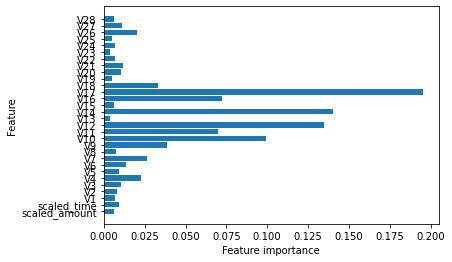

In [13]:
plot_feature_importances(forest)

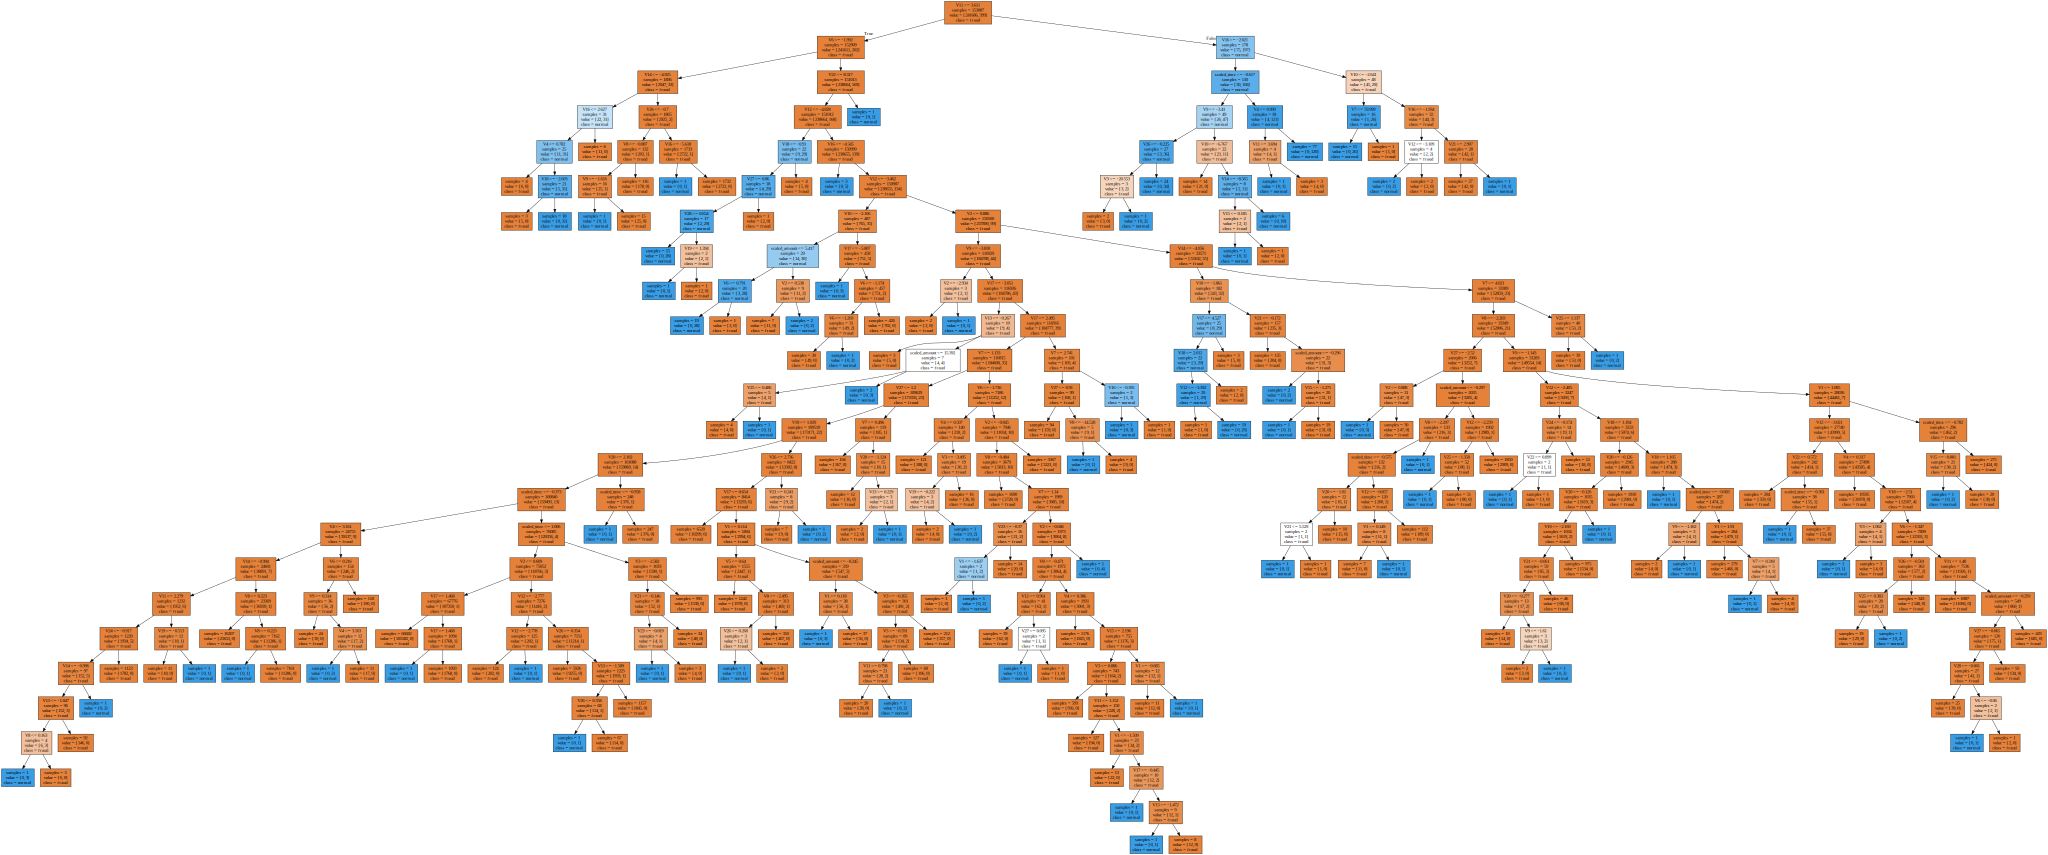

In [15]:
# to export a beautiful tree plot

from sklearn.tree import export_graphviz
import graphviz
export_graphviz(forest.estimators_[0], out_file="forest.dot", class_names=["fraud", "normal"],
                feature_names=X.columns.tolist(), impurity=False, filled=True)


with open("forest.dot") as f: 
    dot_graph = f.read()
graphviz.Source(dot_graph)


In [16]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[42642     3]
 [   26    51]]


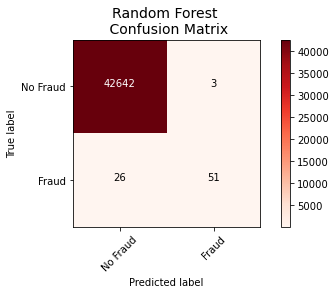

In [18]:
forest_cm = confusion_matrix(y_test, forest.predict(X_test))
labels = ['No Fraud', 'Fraud']

plt.figure()
plot_confusion_matrix(forest_cm, labels, title="Random Forest \n Confusion Matrix", cmap=plt.cm.Reds)

We can see that the recall score is not so satisfactory.

# XGboost
<br>
Let's try another tree model.

In [19]:
import xgboost as xgb

D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

# set ordinary params to see performance quickly
param = {
    'eta': 0.18, 
    'max_depth': 7,  
    'objective': 'multi:softprob',  
    'gamma':4,
    'num_class': 2} 

steps = 60


xgb_model = xgb.train(param, D_train, steps)

preds = xgb_model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

#print("Accuracy on training set: {:.3f}".format(xgb_model.score(X_train, y_train))) 
#print("Accuracy on test set: {:.3f}".format(xgb_model.score(X_test, y_test)))
print("\nAUC score is", roc_auc_score(y_test,best_preds))
print("F1 score is", f1_score(y_test,best_preds))


AUC score is 0.8700946960180164
F1 score is 0.8321167883211679


Confusion matrix, without normalization
[[42642     3]
 [   20    57]]


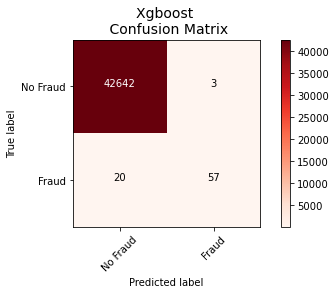

In [20]:
xgboost_cm = confusion_matrix(y_test, best_preds)
labels = ['No Fraud', 'Fraud']

plt.figure()
plot_confusion_matrix(xgboost_cm, labels, title="Xgboost \n Confusion Matrix", cmap=plt.cm.Reds)

Now we have a better recall than random foreset.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

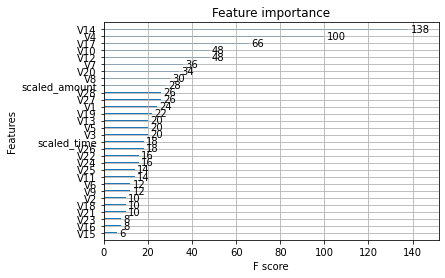

In [21]:
from xgboost import plot_importance
plot_importance(xgb_model)

The feature importance is different from that of random forest.

# Decision Tree
<br>
The fact is, we just quickly jump in complicated tree models like rf and xgb. Maybe this dataset requires no complicated models. Let's see decision trees to check the baseline performance of tree models.

In [22]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0,max_depth=6,max_leaf_nodes=15,min_samples_leaf=10)
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train_t, y_train_t))) 
print("Accuracy on validation set: {:.3f}".format(tree.score(X_val, y_val)))
print("\nAUC score is", roc_auc_score(y_val,tree.predict(X_val)))
print("F1 score is", f1_score(y_val,tree.predict(X_val)))

Accuracy on training set: 1.000
Accuracy on validation set: 1.000

AUC score is 0.9082781654851552
F1 score is 0.8672566371681416


<font color='green'>**Now we see that actually a simple decision tree could have a good performance.**</font>

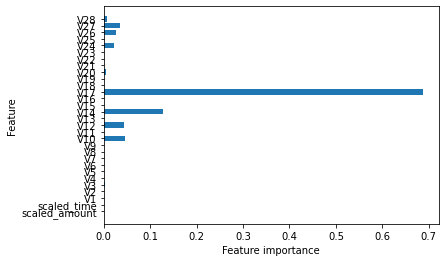

In [23]:
plot_feature_importances(tree)

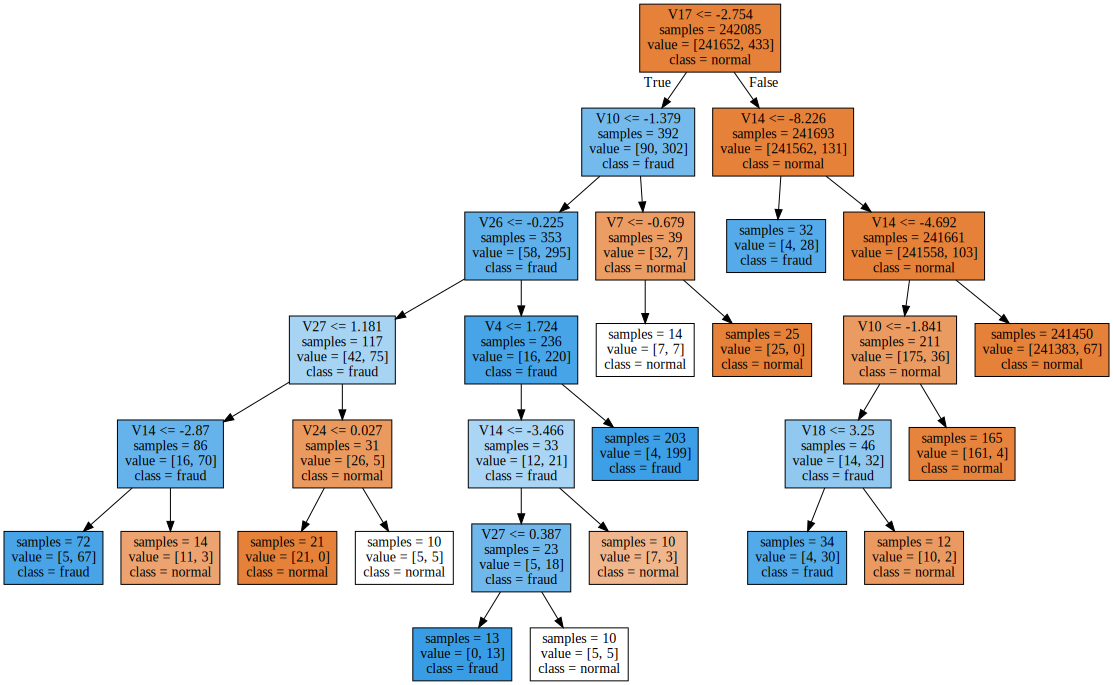

In [24]:
from sklearn.tree import export_graphviz
import graphviz
# class_names,先填normal，再填fraud
aa = export_graphviz(tree, out_file=None, class_names=["normal", "fraud"],
                feature_names=X.columns.tolist(), impurity=False, filled=True) 
    
graph = graphviz.Source(aa)
graph

Confusion matrix, without normalization
[[42641     4]
 [   23    54]]


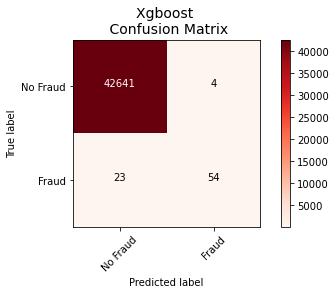

In [24]:
tree_cm = confusion_matrix(y_test, tree.predict(X_test))
labels = ['No Fraud', 'Fraud']

plt.figure()
plot_confusion_matrix(tree_cm, labels, title="Xgboost \n Confusion Matrix", cmap=plt.cm.Reds)

# Resample
<font color='green'>For the dataset is extremely imbalance, it's pushing the model to predict as more 0 as possible. To avoid such problem, we may resample the dataset. There're two ways of resampling: upsamle and undersample.<br>
By upsample we mean to create more positive datasets when training the model and vice versa for undersampling.
**Here,We try to use SMOTE technique to upsample the training set with synthetic positive examples.<font>**

In [25]:
from imblearn.over_sampling import SMOTE
from collections import Counter

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 

In [26]:
sm = SMOTE(sampling_strategy='minority')
X_smote, y_smote = sm.fit_sample(X_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [27]:
Counter(y_smote)

Counter({0: 241670, 1: 241670})

## Decision Tree with SM

In [28]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=0,max_depth=6,max_leaf_nodes=15,min_samples_leaf=10)
tree1.fit(X_smote,y_smote)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_smote, y_smote))) 
print("Accuracy on validation set: {:.3f}".format(tree1.score(X_val, y_val)))
print("\nAUC score is", roc_auc_score(y_val,tree1.predict(X_val)))
print("F1 score is", f1_score(y_val,tree1.predict(X_val)))

Accuracy on training set: 0.953
Accuracy on validation set: 0.969

AUC score is 0.9596495462444488
F1 score is 0.09268292682926829


In [32]:
print("\nAUC score is", roc_auc_score(y_test,tree1.predict(X_test)))
print("F1 score is", f1_score(y_test,tree1.predict(X_test)))


AUC score is 0.9326691364679406
F1 score is 0.09465020576131689


We see that decision tree generates *poor* performance after upsampling.

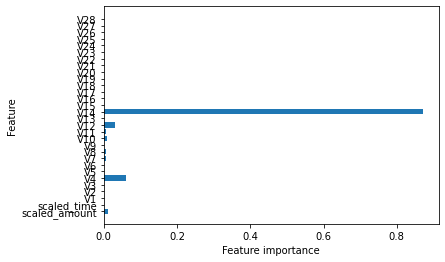

In [30]:
plot_feature_importances(tree1)

Confusion matrix, without normalization
[[41333  1312]
 [    8    69]]


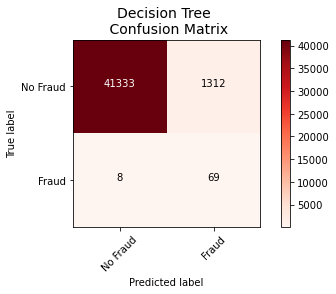

In [33]:
tree_cm1 = confusion_matrix(y_test, tree1.predict(X_test))
labels = ['No Fraud', 'Fraud']

plt.figure()
plot_confusion_matrix(tree_cm1, labels, title="Decision Tree \n Confusion Matrix", cmap=plt.cm.Reds)

## Xgboost with SM

In [34]:
#X_test = X_test[X_train.columns]
import scipy
Xsmote = scipy.sparse.csc_matrix(X_smote)
Xtest = scipy.sparse.csc_matrix(X_test)

In [35]:
import xgboost as xgb

test = X_test[X_train.columns]
D_train = xgb.DMatrix(Xsmote, label=y_smote)
D_test = xgb.DMatrix(Xtest, label=y_test)


param = {
    'eta': 0.18, 
    'max_depth': 7,  
    'objective': 'multi:softprob',  
    'gamma':4,
    'num_class': 2} 

steps = 50


xgb_model1 = xgb.train(param, D_train, steps)

preds = xgb_model1.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

#print("Accuracy on training set: {:.3f}".score(xgb_model1.score(X_smote, y_smote))) 
#print("Accuracy on test set: {:.3f}".format(xgb_model.score(X_test, y_test)))
print("\nAUC score is", roc_auc_score(y_test,best_preds))
print("F1 score is", f1_score(y_test,best_preds))


AUC score is 0.9211985692815802
F1 score is 0.5990783410138248


Confusion matrix, without normalization
[[42570    75]
 [   12    65]]


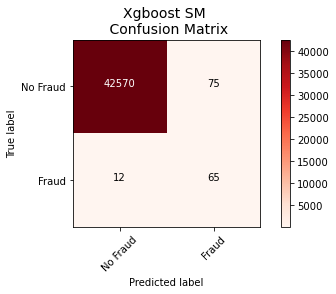

In [36]:
xgb_model1_cm1 = confusion_matrix(y_test, best_preds)
labels = ['No Fraud', 'Fraud']

plt.figure()
plot_confusion_matrix(xgb_model1_cm1, labels, title="Xgboost SM \n Confusion Matrix", cmap=plt.cm.Reds)

We get better recall but worse presicion now.

## Logistic with SM
**Now we have positive and negative sample with same amount.<br> So let's train a logistic regression model another time to check if there's improvements.**

In [37]:
for c in [0.001,0.01,0.1,1]:
    log_reg_s = LogisticRegression(C=c, solver='lbfgs',penalty="l2",max_iter=1500).fit(X_smote,y_smote)
    print("\nAUC score of regularization with L2 of C=" + str(c) +" is:", roc_auc_score(y_test,log_reg_s.predict(X_test)))
    print("F1 score of regularization with L2 of C=" + str(c) +" is:", f1_score(y_test,log_reg_s.predict(X_test)))


AUC score of regularization with L2 of C=0.001 is: 0.9491970100482235
F1 score of regularization with L2 of C=0.001 is: 0.12262521588946458

AUC score of regularization with L2 of C=0.01 is: 0.9489156171533941
F1 score of regularization with L2 of C=0.01 is: 0.12013536379018612

AUC score of regularization with L2 of C=0.1 is: 0.9489156171533941
F1 score of regularization with L2 of C=0.1 is: 0.12013536379018612

AUC score of regularization with L2 of C=1 is: 0.9489156171533941
F1 score of regularization with L2 of C=1 is: 0.12013536379018612


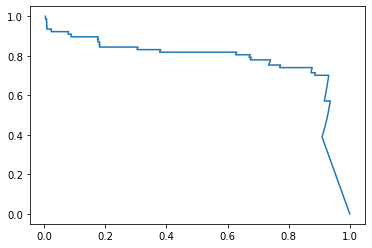

In [38]:
plt.figure()
precision, recall, thresholds = precision_recall_curve(y_test,log_reg_s.predict_proba(X_test)[:,1])
pr_curve = plt.plot(precision, recall, label ='Precision-Recall Curve')

<font color='green'>We have seen that **AUC score has improved significantly to around 90%** although the above PRcurve looks similar as before.<br>
This implies that we can reset the prediction threshold to achieve a better f1 score.
To explore the threshold we can do below raw test:<font>

In [39]:
thresholds = [0.99,0.999,0.9999,0.99999,0.999999]
for i in thresholds:
    print('\nconfusion matrix:\n',confusion_matrix(y_test,log_reg_s.predict_proba(X_test)[:,1]>i))
    print('f1 is:',f1_score(y_test,log_reg_s.predict_proba(X_test)[:,1]>i))
    print('recall is:',recall_score(y_test,log_reg_s.predict_proba(X_test)[:,1]>i))
    print('AUC is:',roc_auc_score(y_test,log_reg_s.predict_proba(X_test)[:,1]>i))


confusion matrix:
 [[42605    40]
 [   14    63]]
f1 is: 0.7
recall is: 0.8181818181818182
AUC is: 0.9086219209328601

confusion matrix:
 [[42621    24]
 [   17    60]]
f1 is: 0.7453416149068324
recall is: 0.7792207792207793
AUC is: 0.8893289967155602

confusion matrix:
 [[42625    20]
 [   19    58]]
f1 is: 0.7483870967741936
recall is: 0.7532467532467533
AUC is: 0.8763888825443521

confusion matrix:
 [[42637     8]
 [   21    56]]
f1 is: 0.7943262411347517
recall is: 0.7272727272727273
AUC is: 0.8635425660047539

confusion matrix:
 [[42638     7]
 [   23    54]]
f1 is: 0.7826086956521738
recall is: 0.7012987012987013
AUC is: 0.8505672777216922


<font color='green'>**From above search we see that increasing the threshold improves model performance in terms of F1 score.<br>
Such improvement basically comes from increasing the precision while hurting just a little recall. In a business context, a higher precision in this case means that every time the model predicts fraud, it is more likely that it is really a fraud.<br>
However a higer precision means that the recall is lower. In a business context, it means that among all the fraud cases, it is less likely for the model to detect.**<br><font>

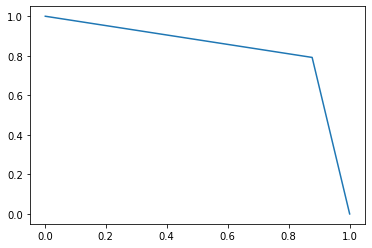

In [18]:
plt.figure()
precision, recall, thresholds = precision_recall_curve(y_test,log_reg_s.predict_proba(X_test)[:,1]>0.99999)
pr_curve = plt.plot(precision, recall, label ='Precision-Recall Curve')

**By increasing the threshold we signifiantly *expand* our PRcurve**

# Stratified datasets
<br>
<font color='green'>The datasets might not distributed evenly, which means that examples with similar features might cluster together and makes out model to overfit particular kinds of examples.<br>
To avoid that we may stratified and shuffle our datasets.<font>

In [40]:
from sklearn.model_selection import KFold, StratifiedKFold

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('\nLabel Distributions: ')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

print("\nshape of original_Xtrain:", original_Xtrain.shape)
print("shape of original_Xtest:", original_Xtest.shape)
print("shape of original_ytrain:", original_ytrain.shape)
print("shape of original_ytest:", original_ytest.shape)

Train: [     0      1      2 ... 284802 284803 284805] Test: [    11     12     15 ... 284789 284804 284806]
Train: [     0      1      3 ... 284803 284804 284806] Test: [     2      9     10 ... 284791 284795 284805]
Train: [     2      4      5 ... 284804 284805 284806] Test: [     0      1      3 ... 284796 284798 284799]
Train: [     0      1      2 ... 284804 284805 284806] Test: [     4      5     19 ... 284793 284800 284803]
Train: [     0      1      2 ... 284804 284805 284806] Test: [     6     13     21 ... 284797 284801 284802]

Label Distributions: 
[0.99827076 0.00172924]
[0.99827952 0.00172048]

shape of original_Xtrain: (227846, 30)
shape of original_Xtest: (56961, 30)
shape of original_ytrain: (227846,)
shape of original_ytest: (56961,)


In [41]:
sm = SMOTE(sampling_strategy='minority')
X_smote_s, y_smote_s = sm.fit_sample(original_Xtrain, original_ytrain)
Counter(y_smote_s)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 227452, 1: 227452})

In [42]:
for c in [0.001,0.01,0.1,1]:
    log_reg_sn = LogisticRegression(C=c, solver='lbfgs',penalty="l2",max_iter=1500).fit(X_smote_s,y_smote_s)
    print("\nAUC score of regularization with L2 of C=" + str(c) +" is:", roc_auc_score(original_ytest,log_reg_sn.predict(original_Xtest)))
    print("F1 score of regularization with L2 of C=" + str(c) +" is:", f1_score(original_ytest,log_reg_sn.predict(original_Xtest)))


AUC score of regularization with L2 of C=0.001 is: 0.957007120946263
F1 score of regularization with L2 of C=0.001 is: 0.11514392991239047

AUC score of regularization with L2 of C=0.01 is: 0.9564883301684286
F1 score of regularization with L2 of C=0.01 is: 0.11104405552202776

AUC score of regularization with L2 of C=0.1 is: 0.9563828134000554
F1 score of regularization with L2 of C=0.1 is: 0.11024565608148593

AUC score of regularization with L2 of C=1 is: 0.9563300550158689
F1 score of regularization with L2 of C=1 is: 0.10985074626865671


**We can see that the performance is even a little worse than before.**

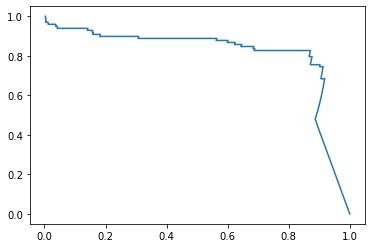

In [43]:
plt.figure()
precision, recall, thresholds = precision_recall_curve(original_ytest,log_reg_sn.predict_proba(original_Xtest)[:,1])
pr_curve = plt.plot(precision, recall, label ='Precision-Recall Curve')

# Shallow neural network with Keras
<br>
<font color='green'>At last we may try a more complicated models such as neural network. To begin we may use Keras to quickly build a simple network to have a try.<font>

In [44]:
n_inputs = X_smote_s.shape[1]
model_regularize = keras.Sequential([
    keras.layers.Dense(units=n_inputs, input_shape=(n_inputs,),activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(32, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(2, activation='softmax')
])

model_regularize.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_regularize.fit(X_smote_s, y_smote_s,validation_split=0.2, batch_size=64, epochs=10, shuffle=True, verbose=2)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 363923 samples, validate on 90981 samples
Epoch 1/10
363923/363923 - 10s - loss: 0.0751 - acc: 0.9851 - val_loss: 0.0448 - val_acc: 0.9959
Epoch 2/10
363923/363923 - 10s - loss: 0.0309 - acc: 0.9963 - val_loss: 0.0367 - val_acc: 0.9959
Epoch 3/10
363923/363923 - 10s - loss: 0.0243 - acc: 0.9971 - val_loss: 0.0295 - val_acc: 0.9933
Epoch 4/10
363923/363923 - 9s - loss: 0.0216 - acc: 0.9972 - val_loss: 0.0184 - val_acc: 0.9985
Epoch 5/10
363923/363923 - 9s - loss: 0.0201 - acc: 0.9975 - val_loss: 0.0124 - val_acc: 0.9999
Epoch 6/10
363923/363923 - 10s - loss: 0.0191 - acc: 0.9976 - val_loss: 0.0147 - val_acc: 0.9985
Epoch 7/10
363923/363923 - 10s - loss: 0.0187 - acc: 0.9975 - val_loss: 0.0181 - val_acc: 0.9991
Epoch 8/10
363923/363923 - 9s - loss: 0.0182 - acc: 0.9975 - val_loss: 0.0138 - val_acc: 1.0000
Epoch 9/10
363923/363923 - 10s - loss: 0.0174 - acc: 0.997

In [45]:
nn_prediction = model_regularize.predict(original_Xtest, batch_size=200, verbose=0)
nnclass_prediction = model_regularize.predict_classes(original_Xtest, batch_size=200, verbose=0)

Confusion matrix, without normalization
[[56714   149]
 [   10    88]]


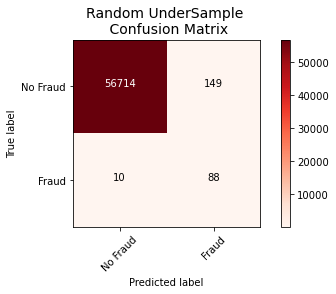

In [46]:
undersample_cm = confusion_matrix(original_ytest, nnclass_prediction)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

plt.figure()
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)


<font color='green'>**From above confusion matrix we can see that this shallow neural network does not outperform logistic regression.<br>
This implies that our dataset does not include difficult non-linear features for the model to learn.**<font>

In [47]:
f1_score(original_ytest,model_regularize.predict_proba(original_Xtest)[:,1]>0.995)

0.8629441624365481

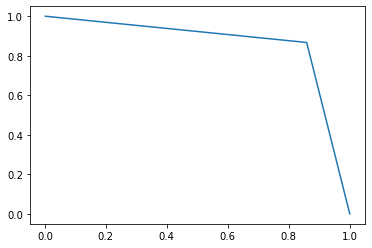

In [48]:
plt.figure()
precision, recall, thresholds = precision_recall_curve(original_ytest,model_regularize.predict_proba(original_Xtest)[:,1]>0.995)
pr_curve = plt.plot(precision, recall, label ='Precision-Recall Curve')

The PRcurve is much smoother than that of logistic regression.<br>
From below model output we see that neural network is more sure of its predictions.

In [49]:
np.round(model_regularize.predict_proba(original_Xtest),3)

array([[0.999, 0.001],
       [1.   , 0.   ],
       [1.   , 0.   ],
       ...,
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ]], dtype=float32)

# Anomaly Detection with MultivariateGaussian
<br>
<font color='green'>When the positive training example is rare or there’s no particular patterns to detect positive examples, supervised learning algorithms are difficult to train. Then comes anomaly detection.
<br><br>
Anomaly detection generally uses Gaussian distribution to find the mean and variance of normal examples. Then we use a validation set with that mean and variance to calculate the probability. Then we try the set a probability threshold so that each calculated probability below that threshold would be predicted as anomaly examples.<font>

In [50]:
df_p = df.loc[df['Class'] == 1]
df_n = df.loc[df['Class'] == 0]
print(df_p.shape)
print(df_n.shape)

(492, 31)
(284315, 31)


We only use nagative(non-fraud) examples to calculate the mean and variance.<br>
Thus the training set will only contains nagative examples.

In [51]:
X_train_anomaly = df_n.iloc[:,:-1]
y_train_anomaly = df_n.iloc[:,-1]

Xn = df_n.iloc[0:1000,:-1]
yn = df_n.iloc[0:1000,-1]
Xp = df_p.iloc[:,:-1]
yp = df_p.iloc[:,-1]

Xtest = pd.concat([Xn,Xp])
ytest = pd.concat([yn,yp])

print(X_train_anomaly.shape)
print(X_test.shape)


(284315, 30)
(42722, 30)


In [52]:
def estimateGaussian(X):
    """
     This function estimates the parameters of a Gaussian distribution using the data in X
    """
    
    m = X.shape[0]
    
    #compute mean
    sum_ = np.sum(X,axis=0)
    mu = 1/m *sum_
    
    # compute variance
    var = 1/m * np.sum((X - mu)**2,axis=0)
    
    return mu,var

mu, sigma2 = estimateGaussian(X_train_anomaly.values)

In [53]:
print(mu.shape)
print(sigma2.shape)

(30,)
(30,)


In [54]:
def multivariateGaussian(X, mu, sigma2):
    """
    Computes the probability density function of the multivariate gaussian distribution.
    """
    k = len(mu)
    
    sigma2=np.diag(sigma2)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma2)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma2) * X,axis=1))
    return p

p = multivariateGaussian(X_train_anomaly.values, mu, sigma2)

In [55]:
p.shape

(284315,)

In [56]:
def selectThreshold(yval, pval):
    """
    Find the best threshold (epsilon) to use for selecting outliers
    """
    best_epi = 0
    best_F1 = 0
    
    stepsize = (max(pval) -min(pval))/1000
    
    epi_range = np.arange(pval.min(),pval.max(),stepsize)
    
    for epi in epi_range:
        predictions = (pval<epi)[:,np.newaxis]
        tp = np.sum(predictions[yval==1]==1)
        fp = np.sum(predictions[yval==0]==1)
        fn = np.sum(predictions[yval==1]==0)
        
        # compute precision, recall and F1
        prec = tp/(tp+fp)
        rec = tp/(tp+fn)
        
        F1 = (2*prec*rec)/(prec+rec)
        
        if F1 > best_F1:
            best_F1 =F1
            best_epi = epi
        
    return best_epi, best_F1, prec, rec

pval = multivariateGaussian(Xtest.values, mu, sigma2)
epsilon, F1, prec, rec = selectThreshold(ytest.values, pval)
print("Best epsilon found using cross-validation:",epsilon)
print("Best F1 on Cross Validation Set:",F1)
print("Recall score:",rec)
print("Precision score:",prec)
print("Outliers found:",sum(pval<epsilon))

Best epsilon found using cross-validation: 1.8751619391371835e-16
Best F1 on Cross Validation Set: 0.7116843702579666
Recall score: 1.0
Precision score: 0.3299798792756539
Outliers found: 826


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars


<font color='green'>**It turns out that anomaly detection was able to get a pretty well recall so that all fraud cases would be detected and the F1 of 71% is fairly well**<font>

# Conclusion
<br>
In this credit card fraud dataset where only **0.0017** positive examples, we have used typical supervised learning algorithm like logistic regression and deep learning algorithm of neural network to detect credit card frauds.
<br>
It turns out that simple tree models could have quite a good performance with F1 score of 86%. <br>
<br>
We also try to upsample the positives to make the dataset more balanced. However, model performance after upsampling is not better than that before.Then we try shallow neural network and the recall improves while the precision deteriorate.<br>
<br>
At last with anomaly detection, we easily achieve a recall score of 100% while the F1 is 71%. Anomaly detection is well suited in situations where positive training examples are not enough and there's no particular patterns of postive examples. 